In [5]:
import numpy as np

# Step 1: Making Word Embeddings (numerical representations of words)
sentence = "The quick brown fox jumps over the lazy dog"
word_embeddings = {
    "The": [0.2, 0.4, -0.1, 0.9],
    "quick": [0.5, -0.3, 0.7, -0.2],
    "brown": [-0.6, 0.1, 0.8, 0.2],
    "fox": [0.4, -0.5, 0.2, 0.6],
    "jumps": [-0.9, 0.6, 0.3, -0.2],
    "over": [0.3, -0.2, 0.1, -0.5],
    "the": [-0.3, -0.1, 0.6, 0.4],
    "lazy": [0.1, -0.8, 0.7, -0.4],
    "dog": [0.6, -0.4, 0.3, 0.1],
}

In [6]:
# Step 2: Query, Key, and Value
queries = np.array([word_embeddings[word] for word in sentence.split()])
keys = np.array([word_embeddings[word] for word in sentence.split()])
values = np.array([word_embeddings[word] for word in sentence.split()])

In [7]:
# Step 3: Measuring Similarity
def calculate_similarity(query, key):
    return np.dot(query, key) / np.sqrt(len(query))

In [15]:
similarities = np.zeros((len(queries), len(keys)))
for i, query in enumerate(queries):
    for j, key in enumerate(keys):
        similarities[i, j] = calculate_similarity(query, key)
print(similarities)

[[ 0.51  -0.135  0.01   0.2   -0.075 -0.24   0.1   -0.365  0.01 ]
 [-0.135  0.435  0.095  0.185 -0.19   0.19   0.11   0.43   0.305]
 [ 0.01   0.095  0.525 -0.005  0.4   -0.11   0.365  0.17  -0.07 ]
 [ 0.2    0.185 -0.005  0.405 -0.36  -0.03   0.145  0.17   0.28 ]
 [-0.075 -0.19   0.4   -0.36   0.65  -0.13   0.155 -0.14  -0.355]
 [-0.24   0.19  -0.11  -0.03  -0.13   0.195 -0.105  0.23   0.12 ]
 [ 0.1    0.11   0.365  0.145  0.155 -0.105  0.31   0.155  0.04 ]
 [-0.365  0.43   0.17   0.17  -0.14   0.23   0.155  0.65   0.275]
 [ 0.01   0.305 -0.07   0.28  -0.355  0.12   0.04   0.275  0.31 ]]


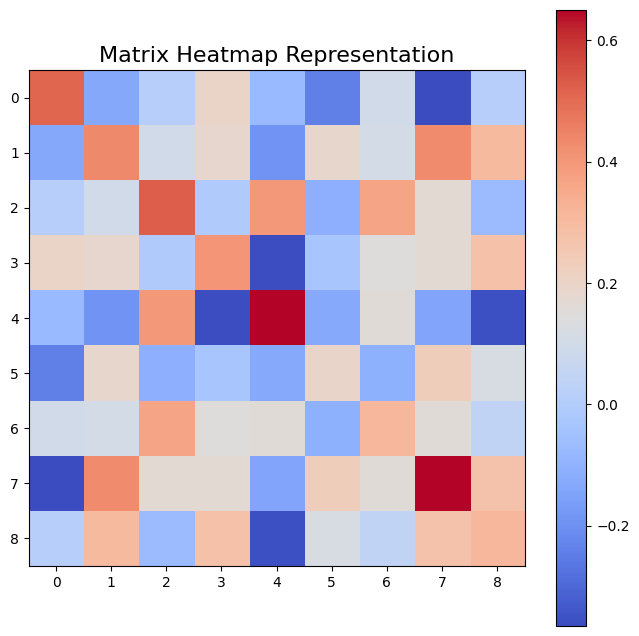

In [17]:
import matplotlib.pyplot as plt
# Plotting the heatmap
plt.figure(figsize=(8, 8))
plt.imshow(similarities, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Adding a color bar to show the color scale
plt.title("Matrix Heatmap Representation", fontsize=16)
plt.show()

In [9]:
# Step 4: Importance Scores
attention_scores = np.exp(similarities) / np.sum(np.exp(similarities), axis=1, keepdims=True)

In [10]:
# Step 5: Paying Attention
weighted_values = attention_scores[:, :, np.newaxis] * values[:, np.newaxis, :]

In [11]:
# Step 6: The Big Picture
output_vector = np.sum(weighted_values, axis=0)

print("Input Sentence:", sentence)
print("Output Vector after Self-Attention:\n", output_vector)

Input Sentence: The quick brown fox jumps over the lazy dog
Output Vector after Self-Attention:
 [[ 0.03917546 -0.06130742  0.31267987  0.20043617]
 [ 0.09858602 -0.20221598  0.43641746  0.06471708]
 [-0.0710919  -0.08052603  0.44755548  0.10880819]
 [ 0.10584594 -0.16992944  0.38092336  0.14960184]
 [-0.13550094 -0.00219351  0.3809952   0.07546433]
 [ 0.06894223 -0.15294356  0.36081895  0.04319559]
 [-0.00864617 -0.10995668  0.41958866  0.12783144]
 [ 0.08601691 -0.23254499  0.47131104  0.03243378]
 [ 0.11667244 -0.18838239  0.38970999  0.09751157]]
